In [7]:
from IPython.display import HTML

In [8]:
HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">TOGGLE CODE ON/OFF</a>
    '''
)

## Simulation Notebook
Hi this is my simulation notebook

In [1]:
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

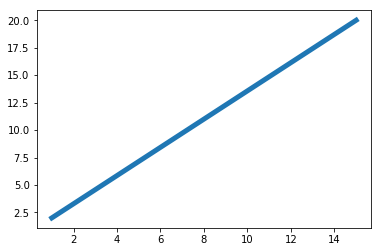

In [5]:
arr1 = [1, 15]
arr2 = [2, 20]
plt.plot(arr1, arr2, linewidth = 5)